<a href="https://colab.research.google.com/github/ManuelGDS/Simulacion-1/blob/main/juego_7_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import random as rnd
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate

# **Ejercicio 5.1**

El famoso juego 7-11 requiere que el jugador lance dos dados una y otra vez hasta tomar la decisión de detenerse o perder el monto. El juego se gana si en el primer lanzamiento los dados suman 7 u 11, o si aparece un 4, 5, 6, 8, 9 o 10 en un lanzamiento y por lo menos una suma reaparece antes de que aparezca un 7. Por otra parte, el juego se pierde si en el primer lanzamiento los dados suman 2, 3 o 12, o si aparece un 4, 5, 6, 8, 9 o 10 en el primer lanzamiento y luego sale un 7 antes de que se repita el primer lanzamiento. Si el valor de la apuesta es de $\$1$ y la ganancia cada vez que se gana una jugada es de $\$1$, ¿cuál sería la probabilidad de quiebra si la cantidad inicial disponible es de $20? $\(Asuma que el juego termina cuando se acumulan \$50)$.

In [12]:
def aleatorios():
  u1 = rnd.random()
  u2 = rnd.random()
  return u1, u2

In [15]:
def valor_dado1(u1):
    if 0 <= u1 <= 1/6:
        x = 1
    elif 1/6 < u1 <= 2/6:
        x = 2
    elif 2/6 < u1 <= 3/6:
        x = 3
    elif 3/6 < u1 <= 4/6:
        x = 4
    elif 4/6 < u1 <= 5/6:
        x = 5
    elif 5/6 < u1 <= 1:
        x = 6
    else:
        x = None  # Manejar otros casos (por ejemplo, R < 0 o R > 1)

    return x



In [17]:
def valor_dado2(u2):
    if 0 <= u2 <= 1/6:
        y = 1
    elif 1/6 < u2 <= 2/6:
        y = 2
    elif 2/6 < u2 <= 3/6:
        y = 3
    elif 3/6 < u2 <= 4/6:
        y = 4
    elif 4/6 < u2 <= 5/6:
        y = 5
    elif 5/6 < u2 <= 1:
        y = 6
    else:
        y = None  # Manejar otros casos (por ejemplo, R < 0 o R > 1)
    return y

In [18]:
def suma_dados(x,y):
  suma_dado = x + y
  return suma_dado

In [35]:
def dado(n):
  dinero_inicial = 20
  dinero_objetivo = 50
  lista_dado1 = []
  lista_dado2 = []
  lista_suma = []
  lista_aleatorios1 = []
  lista_aleatorios2 = []
  quiebras = 0
  resultados = []
  for i in range(1, n):
    lista_iteracion = []
    dinero_actual = dinero_inicial
    iteraciones = 0

    while dinero_actual > 0 and dinero_actual <dinero_objetivo:
      numeroa1, numeroa2 = aleatorios()
      xi = valor_dado1(numeroa1)
      yi = valor_dado2(numeroa2)
      sumaxy = suma_dados(xi, yi)

      lista_aleatorios1.append(numeroa1)
      lista_aleatorios2.append(numeroa2)
      lista_dado1.append(xi)
      lista_dado2.append(yi)
      lista_suma.append(sumaxy)

      iteraciones +=1

      if sumaxy in [7,11]:
        dinero_actual +=1

      elif sumaxy in [2,3,12]:
        dinero_actual -=1
      else:
        lista_aleatorios1 = []
        lista_aleatorios2  =[]
        while True:
          numeroa12, numeroa22 = aleatorios()
          xi2 = valor_dado1(numeroa1)
          yi2 = valor_dado2(numeroa2)
          sumaxy2 = suma_dados(xi, yi)
          nueva_suma = sumaxy2
          iteraciones += 1

          lista_aleatorios1.append(numeroa12)
          lista_aleatorios2.append(numeroa22)
          lista_dado1.append(xi2)
          lista_dado2.append(yi2)
          lista_suma.append(nueva_suma)

          if nueva_suma == sumaxy:
            dinero_actual += 1
            break
          elif nueva_suma ==7:
            dinero_actual -= 1
            break

    if dinero_actual == 0:
      quiebras +=1
    lista_iteracion = [i, dinero_actual, lista_aleatorios1, lista_aleatorios2, lista_dado1, lista_dado2, lista_suma, quiebras]
    resultados.append(lista_iteracion)


  return resultados


In [36]:
def tabular(resultados): #Esta nos regresara ya la tabla elaborada, mas fancy
  tabla = print(tabulate(resultados,headers = ("i","dinero acrual", "aleatorio1", "aleatorio2", "dado1", "dado2", "suma", "dinero actual" ),  tablefmt='grid'))

  return tabla

In [37]:
tabular(dado(4))

+-----+-----------------+-----------------------------------------------------------------------------------+-------------------------------------------------------------------------------------+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+----------------------------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
dado(100)

Me base en esta tabla que encontre para resolverlo pero aun no lo acabo

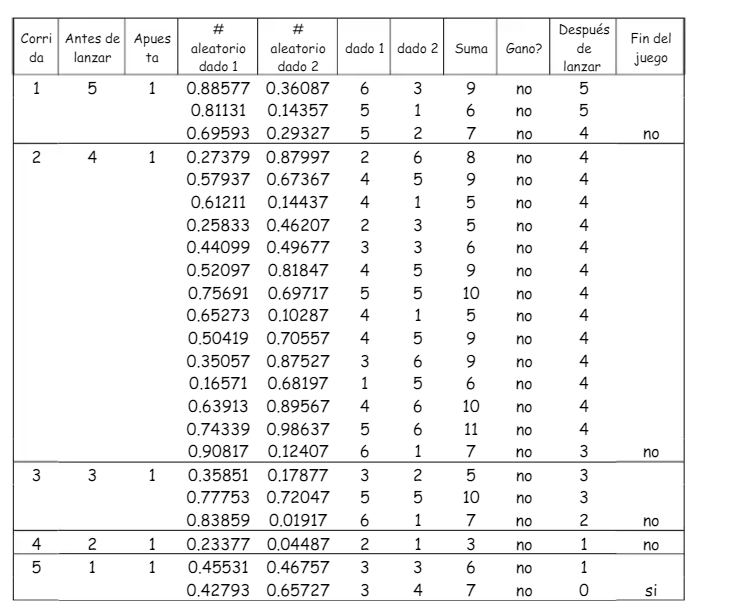
